In [17]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [18]:
# general settings for signal and noise
sample_freq = 1e6  # in Hz
length = 1.0  # in s
signal_power = 0.0  # in dB
noise_power = -15.0  # in dB

# create the signal (the 'soft speaker' kind)
wm = ss.WirelessMicrophone(f_sample=sample_freq, t_sec=length, seed=None)
sig = wm.soft(f_center=1e4, power=signal_power, dB=True)

# create the noise
wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length, seed=None)
noise = wgn.signal(power=noise_power, dB=True)

# ensure noise and signal have same length (and create global variable 'num_samples')
assert wm.num_samples == wgn.num_samples
num_samples = wm.num_samples

# create actual signal ('both') comprising of signal and additive white Gaussian noise (AWGN)
both = sig + noise

# print some info about signal and noise
print('Signal power: %.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:  %.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:          %.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Num samples:  %d' % (num_samples))

# ensure that Parseval's theorem holds
ss.util.check_parseval(both, length, sample_freq)

Signal power: 0.00 dB
Noise power:  -14.99 dB
SNR:          14.99 dB
Num samples:  1000000


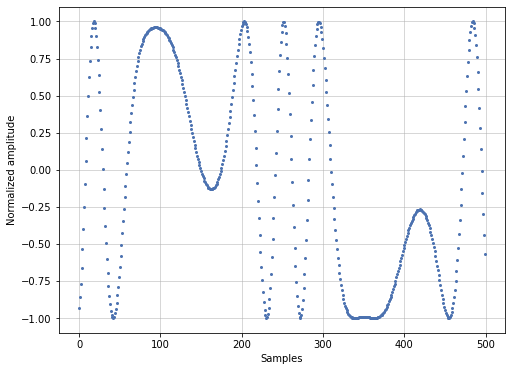

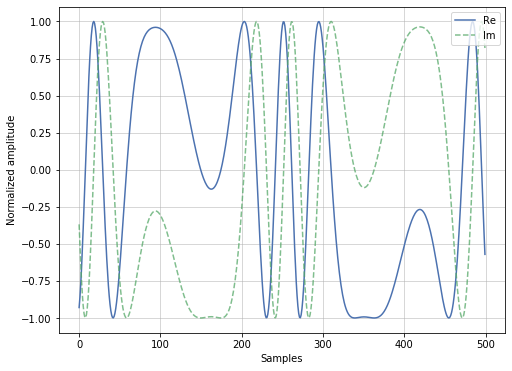

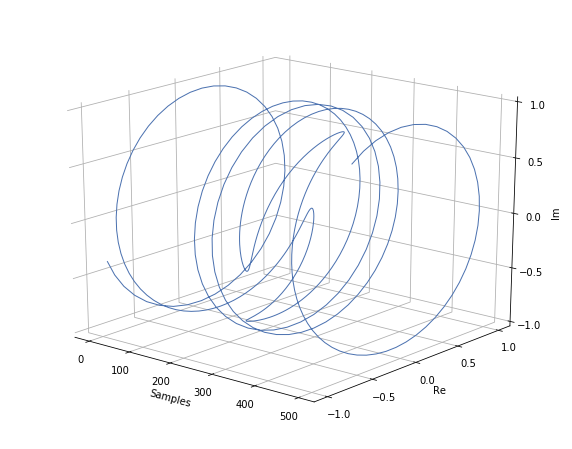

In [19]:
# plot the first n sample points of only signal
n = 500

# actual sample points (only real part)
plt.figure(figsize=(8, 6))
plt.plot(sig[0:n].real, 'o', c='C0', markersize=2, aa=True)
plt.xlabel(r'Samples')
plt.ylabel(r'Normalized amplitude')
plt.grid(linewidth=0.5)
plt.show()

# with linear interpolation (both real and imaginary parts)
plt.figure(figsize=(8, 6))
plt.plot(sig[0:n].real, '-', aa=True)
plt.plot(sig[0:n].imag, '--', alpha=0.75, aa=True)
plt.legend(('Re', 'Im'), loc=1)
plt.xlabel(r'Samples')
plt.ylabel(r'Normalized amplitude')
plt.grid(linewidth=0.5)
plt.show()

# the complex signal can also be displayed in 3d
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.plot(np.arange(0, n),
        sig[0:n].real,
        sig[0:n].imag,
        c='C0',
        alpha=1.0,
        linewidth=1.0)
ax.view_init(elev=20, azim=-50)
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax.set_zticks([-1.0, -0.5, 0.0, 0.5, 1.0])

ax.zaxis.set_rotate_label(False)
ax.set_xlabel(r'Samples')
ax.set_ylabel(r'Re')
ax.set_zlabel(r'Im', rotation=90)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
plt.show()

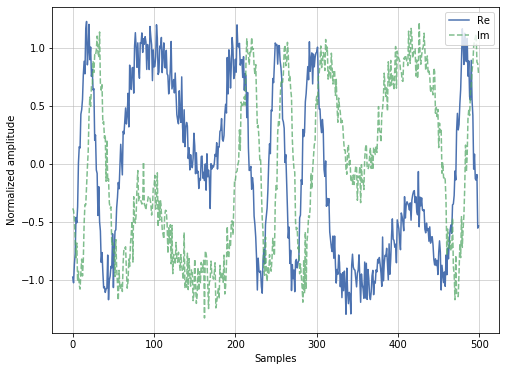

In [20]:
# plot the first n sample points of signal and noise ('both')
plt.figure(figsize=(8, 6))
plt.plot(both[0:n].real, '-', aa=True)
plt.plot(both[0:n].imag, '--', alpha=0.75, aa=True)
plt.legend(('Re', 'Im'), loc=1)
plt.xlabel(r'Samples')
plt.ylabel(r'Normalized amplitude')
plt.grid(linewidth=0.5)
plt.show()